<a href="https://colab.research.google.com/github/HosseinZaredar/Studies/blob/main/Stanford%20ML/Logistic-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
!pip install drawdata
!pip install pandas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
from google.colab import files
import io

# Functions

In [ ]:
def plot_dataset(X, y, offset=0):
    plt.figure(figsize=(5, 5))
    for point, output in zip(X, y):
        if output == 1:
            color = 'g'
        else:
            color = 'r'
        plt.scatter(point[0 + offset], point[1 + offset], color=color)

In [ ]:
def plot_decision_boundary(X, y, f):
    plot_dataset(X, y, offset=1)
    x1 = x2 = np.arange(-1, 1.05, 0.05)
    X1, X2 = np.meshgrid(x1, x2)
    ys = np.array(f(np.ravel(X1), np.ravel(X2)))
    Y = ys.reshape(X1.shape)
    plt.contour(X1, X2, Y, [-0.1, 0.1])

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
def grad(X, theta):
    m = len(X)
    grad_theta = np.transpose(X) @ (sigmoid(X @ theta) - y) / m
    return grad_theta

# Creating Dataset

In [ ]:
from drawdata import draw_scatter
draw_scatter()

# Loading Dataset

In [ ]:
uploaded = files.upload()
df = pd.read_csv(io.StringIO(uploaded[next(iter(uploaded))].decode('utf-8')))

Saving data (2).csv to data (2).csv


In [ ]:
X = np.array(df.iloc[:, 0:2] / 300 - 1)
y = np.array([np.array([1]) if item == 'a' else np.array([0]) for item in df.iloc[:, 2]])

# Logistic Regression

In [ ]:
m = len(X)
X = np.hstack((np.ones((len(X), 1)), X, X[:, [0]] ** 2, X[:, [1]] ** 2, X[:, [0]] * X[:, [1]]))

theta = np.zeros((6, 1))

alpha = 1

for it in range(100000):
    theta -= alpha * grad(X, theta)
    
print(theta)

[[ -2.85470314]
 [-18.33473079]
 [ 33.96940648]
 [ 21.10912588]
 [ 51.2166822 ]
 [-25.35548031]]


# Plotting The Sigmoid Curve


In [ ]:
x1 = x2 = np.arange(-1.5, 1.5, 0.05)
X1, X2 = np.meshgrid(x1, x2)
ys = np.array(f(np.ravel(X1), np.ravel(X2)))
Y = ys.reshape(X1.shape)

fig = go.Figure(data=[go.Surface(z=Y, x=X1, y=X2)])
fig.update_layout(autosize=False, width=500, height=500,)
fig.show()

# Plotting The Decision Boundary

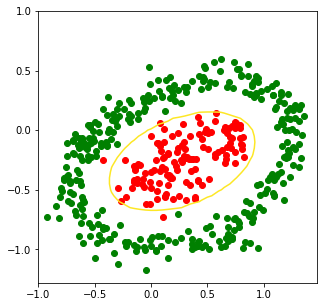

In [ ]:
f = lambda x1, x2 : sigmoid(theta[0, 0] + x1 * theta[1, 0] + x2 * theta[2, 0]
                            + x1 ** 2 * theta[3, 0] + x2 ** 2 * theta[4, 0] + x1 * x2 * theta[5, 0])  

plot_decision_boundary(X, y, f)